<a href="https://colab.research.google.com/github/OrlandoBolivar/Clustering-ass-2/blob/main/assignment_part_B_final2(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Retrieving data> Google Drive**

Mounting Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/
%cd MyDrive

Mounted at /content/gdrive
/content/gdrive
/content/gdrive/MyDrive


Loading Dataset

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
df= pd.read_csv('BigBlue.csv')
df.head()

,EmployeeID,UsageRate,Recognition,Leader
0,1,0.00,0,0
1,2,0.63,0,0
2,3,0.00,0,0
3,4,0.00,0,0
4,5,0.00,0,0


from matplotlib import pyplot as plt
_df_0['EmployeeID'].plot(kind='hist', bins=20, title='EmployeeID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['UsageRate'].plot(kind='hist', bins=20, title='UsageRate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='EmployeeID', y='UsageRate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['EmployeeID']
  ys = series['UsageRate']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('EmployeeID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('EmployeeID')
_ = plt.ylabel('UsageRate')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['EmployeeID']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'EmployeeID'}, axis=1)
              .sort_values('EmployeeID', ascending=True))
  xs = counted['EmployeeID']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('EmployeeID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('EmployeeID')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Recognition']
  ys = series['UsageRate']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Recognition', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Recognition')
_ = plt.ylabel('UsageRate')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Recognition']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Recognition'}, axis=1)
              .sort_values('Recognition', ascending=True))
  xs = counted['Recognition']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Recognition', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Recognition')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_7['EmployeeID'].plot(kind='line', figsize=(8, 4), title='EmployeeID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['UsageRate'].plot(kind='line', figsize=(8, 4), title='UsageRate')
plt.gca().spines[['top', 'right']].set_visible(False)

Droping the varible, EmployeeID,  which is not helpfull for the clustering!

EmployeeID is an unique identifier and carries not useful information for clustering

In [12]:
df_feature= df.drop(['EmployeeID'], axis=1)
df_feature.head()

,UsageRate,Recognition,Leader
0,0.00,0,0
1,0.63,0,0
2,0.00,0,0
3,0.00,0,0
4,0.00,0,0


**You may first explore the basic feature of the dataset!**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EmployeeID   107 non-null    int64  
 1   UsageRate    107 non-null    float64
 2   Recognition  107 non-null    int64  
 3   Leader       107 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.5 KB


You may use silhouette_score for finding the optimum number of clusters!

Silhouette Scores for k = 2 to 9: [np.float64(0.7976895120261503), np.float64(0.7584633424168898), np.float64(0.6724963599019561), np.float64(0.6947336374826414), np.float64(0.7156809083947152), np.float64(0.7168131807844937), np.float64(0.7188286716181617), np.float64(0.6315114022665363)]
Best number of clusters based on silhouette score: 2


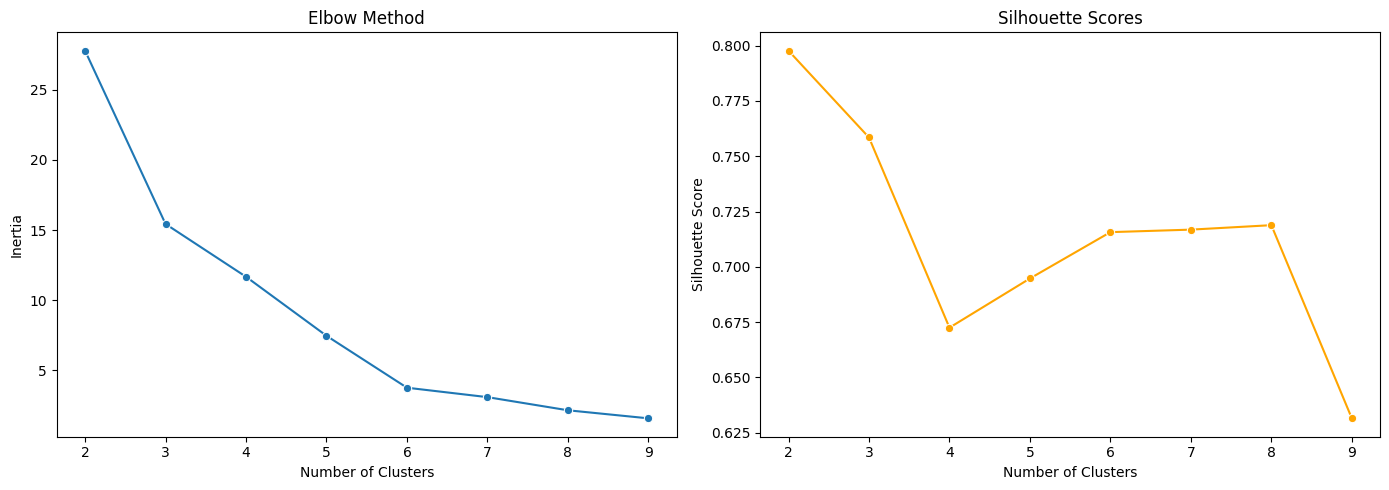

Best number of clusters based on silhouette score: 2


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

inertia = []
silh = []
y = range(2, 10)  # Trying cluster numbers from 2 to 9

for n in y:
    kmeans = KMeans(n_clusters=n, random_state=42).fit(df_feature)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(df_feature, kmeans.labels_)
    silh.append(score)

# Print silhouette scores
print("Silhouette Scores for k = 2 to 9:", silh)

# Find the best number of clusters based on silhouette
optimal_k = np.argmax(silh) + 2  # +2 because range starts at 2
print("Best number of clusters based on silhouette score:", optimal_k)

# Plot Elbow Method and Silhouette Score
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.lineplot(x=list(y), y=inertia, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
sns.lineplot(x=list(y), y=silh, marker="o", color='orange')
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

# Find the index of the max score and add 2 because we started from k=2
optimal_k = np.argmax(silh) + 2
print("Best number of clusters based on silhouette score:", optimal_k)

you can use below code to see the cluster centers, I did for the case when you decide the value of 4 as number of clusters

In [21]:
kmeans = KMeans(n_clusters=9).fit(df_feature)
kmeans.cluster_centers_

array([[3.66666667e-02, 2.77555756e-16, 4.85722573e-17],
       [7.25000000e-01, 3.00000000e+00, 0.00000000e+00],
       [7.40000000e-01, 1.00000000e+00, 6.93889390e-18],
       [9.70000000e-01, 3.00000000e+00, 2.00000000e+00],
       [6.67857143e-01, 5.55111512e-17, 6.93889390e-18],
       [7.50000000e-01, 2.00000000e+00, 1.66666667e-01],
       [5.40000000e-01, 3.00000000e+00, 1.00000000e+00],
       [2.35185185e-01, 2.22044605e-16, 6.93889390e-18],
       [8.20000000e-01, 4.00000000e+00, 0.00000000e+00]])

In [22]:
np.around(kmeans.cluster_centers_, decimals=6)

array([[0.036667, 0.      , 0.      ],
       [0.725   , 3.      , 0.      ],
       [0.74    , 1.      , 0.      ],
       [0.97    , 3.      , 2.      ],
       [0.667857, 0.      , 0.      ],
       [0.75    , 2.      , 0.166667],
       [0.54    , 3.      , 1.      ],
       [0.235185, 0.      , 0.      ],
       [0.82    , 4.      , 0.      ]])

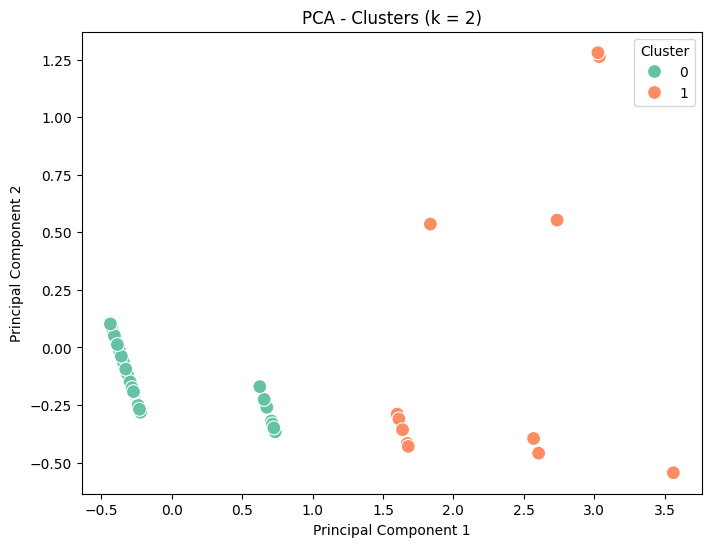

In [23]:
from sklearn.decomposition import PCA

# Fit KMeans with optimal_k
kmeans = KMeans(n_clusters=optimal_k, random_state=42).fit(df_feature)
labels = kmeans.labels_

# Reduce dimensions with PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_feature)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=labels, palette="Set2", s=100)
plt.title(f"PCA - Clusters (k = {optimal_k})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.show()